In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


In [84]:
import numpy as np
import pandas as pd

In [85]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [86]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [87]:
import pandas as pd 

In [88]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [89]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [90]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [93]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [94]:
engine.execute('SELECT * FROM station ').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [95]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [96]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [97]:
session = Session(engine)

In [98]:
maxDate = session.query(Measurement).order_by(Measurement.date.desc()).limit(1)

for date in maxDate:
    maxDate1 = date.date

maxDate1 = dt.datetime.strptime(maxDate1, "%Y-%m-%d")

#
## Calculate the date 1 year ago from the last data point in the database
startDate = maxDate1 - dt.timedelta(days=365)
#

# Exploratory Climate Analysis

In [111]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

avgprcp = session.query(Measurement.date, Measurement.prcp).\
   filter(Measurement.date >= startDate).\
   order_by(Measurement.date).all()

avgprcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

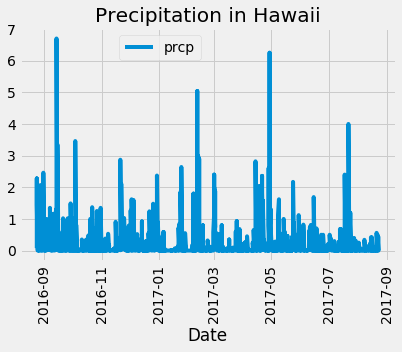

<Figure size 432x288 with 0 Axes>

In [112]:
# Save the query results as a Pandas DataFrame and set the index to the date column

avgPrcp_df = pd.DataFrame(avgprcp).dropna()
avgPrcp_df['date'] = pd.to_datetime(avgPrcp_df['date'])
plt.plot(avgPrcp_df['date'], avgPrcp_df['prcp'])
plt.title("Precipitation in Hawaii")
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(0.5, 1.00))
plt.xticks(rotation='90')
#plt.tight_layout()
plt.show()
plt.savefig("Precipitation.png")

In [101]:
avgPrcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15


![precipitation](Images/precipitation.png)

In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data
avgPrcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [103]:
# Design a query to show how many stations are available in this dataset?
cnt=engine.execute('SELECT count(*) FROM station ').fetchall()
cnt


[(9,)]

In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('SELECT station,count(*) as cnt  FROM measurement group by station order by cnt desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [105]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

######NOT GETTING THE ANSWER MENTIONED IN THE GIT LAB ((54.0, 85.0, 71.66378066378067))
#sel = [Dow.stock, 
##       func.avg(Dow.open_price), 
##       func.avg(Dow.high_price), 
##       func.avg(Dow.low_price), 
##       func.avg(Dow.close_price)]
##may_averages = session.query(*sel).\
##    filter(func.strftime("%m", Dow.date) == "05").\
##    group_by(Dow.stock).\
##    order_by(Dow.stock).all()
#may_averages 
mostActvStn = session.query(Measurement.station,
                                   func.count(Measurement.station).label('cnt')).\
                                   group_by(Measurement.station).\
                                   order_by('cnt DESC').limit(1)[0][0]
sel = [func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

session.query(*sel).filter(Measurement.station==mostActvStn).all()
mostActvStn

C:\Users\Kurian\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'cnt DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


'USC00519281'

In [106]:
# Choose the station with the highest number of temperature observations.
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempData = session.query(func.strftime("%m", Measurement.date).label('mnth'), Measurement.tobs).\
   filter(Measurement.date >= startDate).\
   filter(Measurement.station==mostActvStn).\
   order_by('mnth').all()
tempData


tempDatadf = pd.DataFrame(tempData).dropna()
tempDatadf
x=tempDatadf['tobs']
x
#
#

0      72.0
1      70.0
2      64.0
3      63.0
4      63.0
5      62.0
6      70.0
7      70.0
8      62.0
9      62.0
10     63.0
11     65.0
12     69.0
13     77.0
14     70.0
15     74.0
16     69.0
17     72.0
18     71.0
19     69.0
20     71.0
21     71.0
22     72.0
23     72.0
24     69.0
25     70.0
26     66.0
27     65.0
28     69.0
29     68.0
       ... 
321    70.0
322    72.0
323    70.0
324    67.0
325    67.0
326    69.0
327    70.0
328    68.0
329    69.0
330    69.0
331    66.0
332    65.0
333    68.0
334    62.0
335    75.0
336    70.0
337    69.0
338    76.0
339    76.0
340    74.0
341    73.0
342    71.0
343    74.0
344    74.0
345    72.0
346    71.0
347    72.0
348    74.0
349    69.0
350    67.0
Name: tobs, Length: 351, dtype: float64

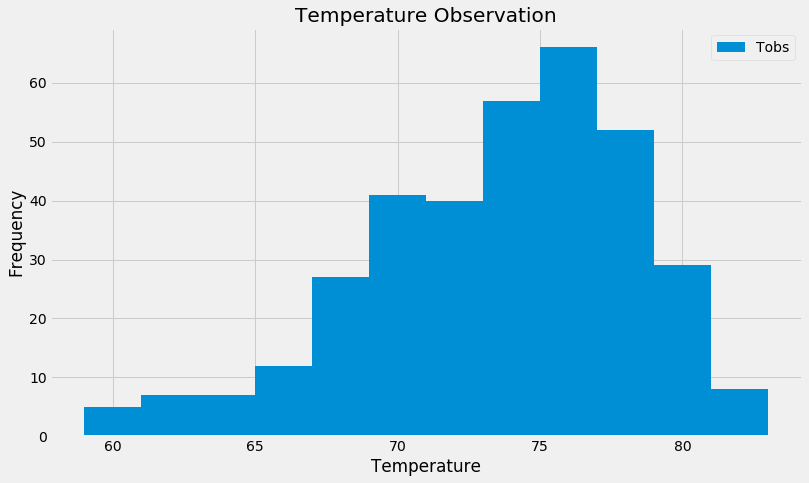

In [107]:
plt.figure(figsize=[12, 7])
plt.hist(tempDatadf['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.legend(["Tobs"])
plt.title('Temperature Observation')
plt.savefig("temperature_observation-Histogram.png")
plt.show()

![precipitation](Images/station-histogram.png)

In [114]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    output = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    print (output[0][2])
    return (output)
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

74.0
[(62.0, 69.57142857142857, 74.0)]


In [109]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tripT = calc_temps('2015-01-01', '2016-01-01')

tMax = tripT[0][1] - tripT[0][0]
tMin = tripT[0][2] - tripT[0][1]



86.0


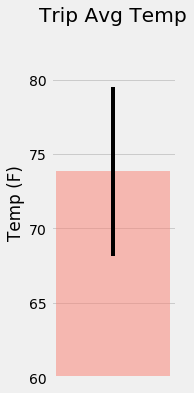

In [110]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,6))
plt.bar(0, tripT[0][1], yerr=[tMax-tMin], color='salmon', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)
plt.savefig("Trip Avg Temp.png")
plt.show()

In [123]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def calc_prcp(start_date, end_date):
  
    sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation, Measurement.prcp]
    op = session.query(*sel).filter(Station.station == Measurement.station).\
    filter(Measurement.date >= startDate).\
    order_by(Measurement.prcp).all()
    op_df = pd.DataFrame(op).dropna()
    return (op_df)
# function usage example
print(calc_prcp('2012-02-28', '2012-03-05'))




          station                                    name  latitude  \
208   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
209   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
210   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
211   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
212   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
213   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
214   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
215   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
216   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
217   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
218   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
219   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
220   USC00519397                    WAIKIKI 717.2, HI US  21.27160   
221   

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
